#強化学習の演習

##環境設定

In [1]:
!apt-get -qq -y install libcusparse8.0 libnvrtc8.0 libnvtoolsext1 > /dev/null
!ln -snf /usr/lib/x86_64-linux-gnu/libnvrtc-builtins.so.8.0 /usr/lib/x86_64-linux-gnu/libnvrtc-builtins.so

!apt-get -qq -y install xvfb freeglut3-dev ffmpeg> /dev/null
!pip install pyglet
!pip install pyopengl
!pip install pyvirtualdisplay #####
!pip install gym[classic_control]

E: Unable to locate package libcusparse8.0
E: Couldn't find any package by glob 'libcusparse8.0'
E: Couldn't find any package by regex 'libcusparse8.0'
E: Unable to locate package libnvrtc8.0
E: Couldn't find any package by glob 'libnvrtc8.0'
E: Couldn't find any package by regex 'libnvrtc8.0'


In [3]:
!apt-get install x11-utils

Reading package lists... Done
Building dependency tree       
Reading state information... Done
x11-utils is already the newest version (7.7+3build1).
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.


「不明な理由により、セッションがクラッシュしました。」が表示された場合は再度ディスプレイの表示設定を実行してください。

In [0]:
from pyvirtualdisplay import Display
display = Display(visible=0, size=(1024, 768))
display.start()
import os
os.environ["DISPLAY"] = ":" + str(display.display) + "." + str(display.screen)

## AI gymの確認

KeyboardInterrupt: ignored

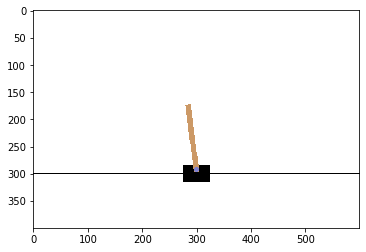

In [2]:
import gym
from IPython import display
import matplotlib.pyplot as plt
%matplotlib inline

env = gym.make('CartPole-v0')

for n_episode in range (3):
    observation = env.reset()
    for t in range(100):
        plt.imshow(env.render(mode='rgb_array'))
        display.clear_output(wait=True)
        display.display(plt.gcf())

        action = env.action_space.sample() # アクションのランダム選択
        observation, reward, done, info = env.step(action) # アクションの実行

        # (本来は, エージェントの状態を更新する処理を記述)

        if done:
            print("Episode {} finished after {} timesteps".format(n_episode+1,t+1))
            break

##Q学習の確認

In [0]:
import gym
import numpy as np
import random

env = gym.make('CartPole-v1')

class Agent:
    def __init__(self):
        self.Q = np.zeros((5**4,2))
        self.last_s = None
        self.last_a = None
        
    def quantize5(self, x, a, b):
        return 0 if x < -a else 1 if x < -b else \
               2 if x <= b else 3 if x <= a else 4

    def quantize(self, obs):
        pos = self.quantize5(obs[0], 1.2, 0.2)
        vel = self.quantize5(obs[1], 1.5, 0.2)
        ang = self.quantize5(obs[2], 0.25, 0.02)
        acc = self.quantize5(obs[2], 1.0, 0.2)
        return  pos + vel * 5 + ang * 25 + acc * 125
    
    def action(self, obs, episode, reward):
        s = self.quantize(obs)
        if random.random() > 0.5 * (1 / (episode + 1)):
            a = np.argmax(self.Q[s,:])
        else:
            a = random.randint(0, 1)
            
        if self.last_s is not None:
            q = self.Q[self.last_s, self.last_a]
            self.Q[self.last_s, self.last_a] = \
               q + 0.2 * (reward + 0.99 * np.max(self.Q[s,:]) - q)
        self.last_s = s
        self.last_a = a
        return a

In [3]:
agent = Agent()

steps = []
for episode in range(100):
    observation = env.reset()

    reward = 0
    for step in range(200):
        #env.render()

        action = agent.action(observation, episode, reward)
        observation, reward, done, info = env.step(action)
        if done:
            agent.action(observation, episode, -200)
            break
            
    print('Episode {} finished after {} timesteps'.format(episode+1, step+1))
    steps.append(step+1)
env.close()

Episode 1 finished after 18 timesteps
Episode 2 finished after 19 timesteps
Episode 3 finished after 11 timesteps
Episode 4 finished after 20 timesteps
Episode 5 finished after 27 timesteps
Episode 6 finished after 55 timesteps
Episode 7 finished after 14 timesteps
Episode 8 finished after 97 timesteps
Episode 9 finished after 37 timesteps
Episode 10 finished after 34 timesteps
Episode 11 finished after 31 timesteps
Episode 12 finished after 13 timesteps
Episode 13 finished after 9 timesteps
Episode 14 finished after 22 timesteps
Episode 15 finished after 19 timesteps
Episode 16 finished after 8 timesteps
Episode 17 finished after 76 timesteps
Episode 18 finished after 33 timesteps
Episode 19 finished after 92 timesteps
Episode 20 finished after 136 timesteps
Episode 21 finished after 76 timesteps
Episode 22 finished after 197 timesteps
Episode 23 finished after 131 timesteps
Episode 24 finished after 130 timesteps
Episode 25 finished after 148 timesteps
Episode 26 finished after 177 t

##学習結果の描画

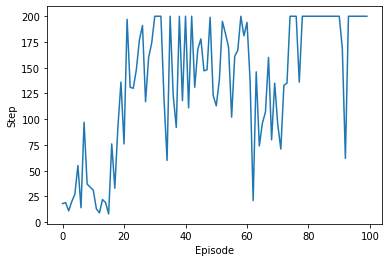

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure()
plt.plot(steps)
plt.xlabel('Episode') # 横軸, エピソード(学習回数)
plt.ylabel('Step') # 縦軸, Step数(棒を倒すまで何回移動できたか)
plt.show()

In [0]:
import gym
from IPython import display
import matplotlib.pyplot as plt
%matplotlib inline

env = gym.make('CartPole-v1')

for episode in range (3):
    observation = env.reset()
    reward = 0
    for t in range(100):
        plt.imshow(env.render(mode='rgb_array'))
        display.clear_output(wait=True)
        display.display(plt.gcf())

#        action = env.action_space.sample() # アクションのランダム選択
#        observation, reward, done, info = env.step(action) # アクションの実行

        action = agent.action(observation, episode, reward)
        observation, reward, done, info = env.step(action)

        # (本来は, エージェントの状態を更新する処理を記述)

        if done:
            print("Episode {} finished after {} timesteps".format(episode+1,t+1))
            break